# TA 2 Deep learning SEMESTER VI
## Pest-Dection
### Dataset Link : https://www.kaggle.com/datasets/shruthisindhura/pestopia/data
### No of Species : 4
#### Species categories : ['Potosiabre vitarsis', 'Thrips', 'Xylotrechus', 'army worm']

##### Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout,Conv2D,MaxPooling2D

In [3]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Pest_Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2007 files belonging to 4 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potosiabre vitarsis', 'Thrips', 'Xylotrechus', 'army worm']

In [33]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(64, 256, 256, 3)
[3 2 1 3 3 3 3 1 0 0 1 3 2 2 2 3 2 1 0 2 0 1 0 1 0 1 0 2 3 2 2 3 2 1 2 3 1
 2 1 1 2 3 1 2 3 1 2 0 2 2 2 1 3 2 2 2 2 0 3 0 0 2 3 3]


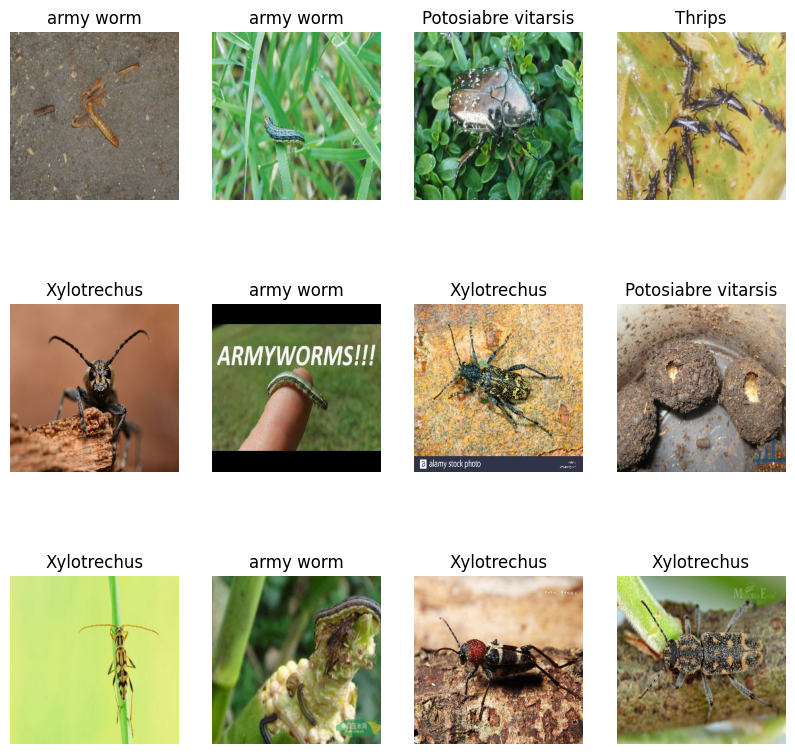

In [34]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [35]:
len(dataset)

32

In [36]:
train_size = 0.8
len(dataset)*train_size

25.6

In [37]:
train_ds = dataset.take(25)
len(train_ds)

25

In [38]:
test_ds = dataset.skip(25)
len(test_ds)

7

In [39]:
val_size=0.1
len(dataset)*val_size

3.2

In [40]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [41]:
test_ds = test_ds.skip(3)
len(test_ds)

4

In [42]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [43]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [44]:
len(train_ds)

25

In [45]:
len(val_ds)

3

In [46]:
len(test_ds)

4

In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [48]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = Sequential()
layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
layers.experimental.preprocessing.Rescaling(1./255),
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
     

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 127, 127, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                      

In [52]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [53]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
25/25 [==============================] - 38s 1s/step - loss: 6.3563 - accuracy: 0.2744 - val_loss: 1.4280 - val_accuracy: 0.3229
Epoch 2/20
25/25 [==============================] - 22s 892ms/step - loss: 1.3154 - accuracy: 0.3688 - val_loss: 1.5347 - val_accuracy: 0.3594
Epoch 3/20
25/25 [==============================] - 22s 868ms/step - loss: 1.1320 - accuracy: 0.5188 - val_loss: 1.4876 - val_accuracy: 0.4062
Epoch 4/20
25/25 [==============================] - 19s 770ms/step - loss: 0.8781 - accuracy: 0.6650 - val_loss: 1.4323 - val_accuracy: 0.4635
Epoch 5/20
25/25 [==============================] - 20s 795ms/step - loss: 0.5969 - accuracy: 0.7819 - val_loss: 1.0310 - val_accuracy: 0.6615
Epoch 6/20
25/25 [==============================] - 22s 873ms/step - loss: 0.3875 - accuracy: 0.8606 - val_loss: 0.5917 - val_accuracy: 0.7865
Epoch 7/20
25/25 [==============================] - 19s 754ms/step - loss: 0.2083 - accuracy: 0.9388 - val_loss: 0.4587 - val_accuracy: 0.8698
Ep

In [54]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 11s 248ms/step - loss: 0.4193 - accuracy: 0.9141


In [55]:
scores

[0.4193299114704132, 0.9140625]

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

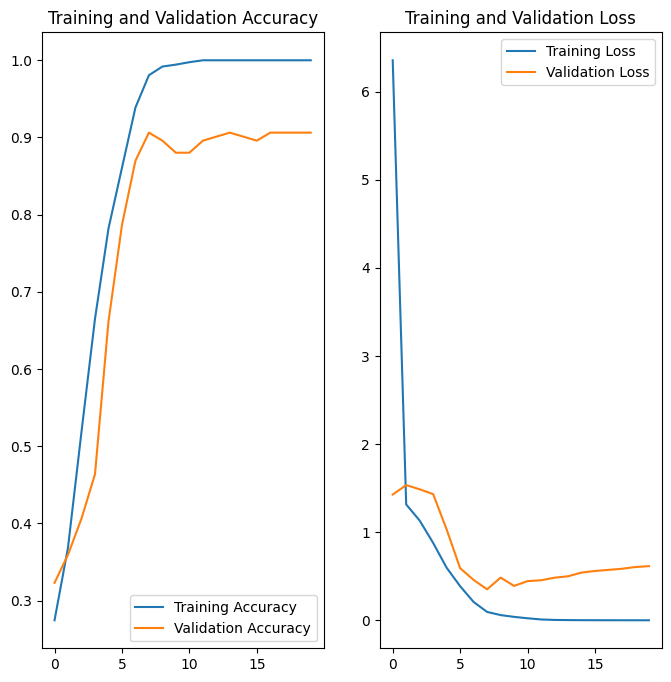

In [59]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Thrips
2/2 [==============================] - 1s 104ms/step
predicted label: Thrips
2/2 [==============================] - 0s 104ms/step
61


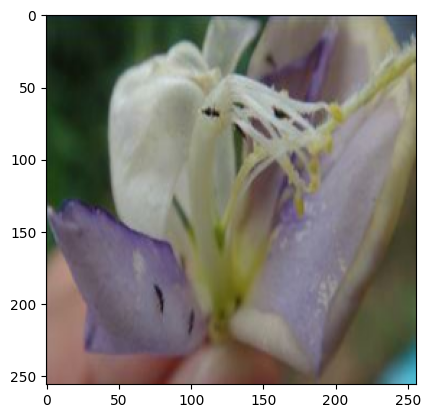

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    predictions = model.predict(images_batch)
    print(np.argmax(predictions))

In [63]:
model.save("../my_model_11.h5")

# VGG MODEL

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Create a Sequential model
model = Sequential([
    base_model,
    Flatten(),
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 4)                 131076    
                                                                 
Total params: 14845764 (56.63 MB)
Trainable params: 131076 (512.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [30]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=6,
)

Epoch 1/6


25/25 [==============================] - 538s 21s/step - loss: 7.2511 - accuracy: 0.4938 - val_loss: 2.7829 - val_accuracy: 0.7240
Epoch 2/6
25/25 [==============================] - 502s 20s/step - loss: 1.6823 - accuracy: 0.8288 - val_loss: 1.2662 - val_accuracy: 0.8490
Epoch 3/6
25/25 [==============================] - 497s 20s/step - loss: 0.5142 - accuracy: 0.9219 - val_loss: 0.5346 - val_accuracy: 0.9219
Epoch 4/6
25/25 [==============================] - 460s 18s/step - loss: 0.1097 - accuracy: 0.9800 - val_loss: 0.4246 - val_accuracy: 0.9583
Epoch 5/6
25/25 [==============================] - 464s 19s/step - loss: 0.0363 - accuracy: 0.9956 - val_loss: 0.3263 - val_accuracy: 0.9583
Epoch 6/6
25/25 [==============================] - 431s 17s/step - loss: 0.0094 - accuracy: 0.9981 - val_loss: 0.3228 - val_accuracy: 0.9531


In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

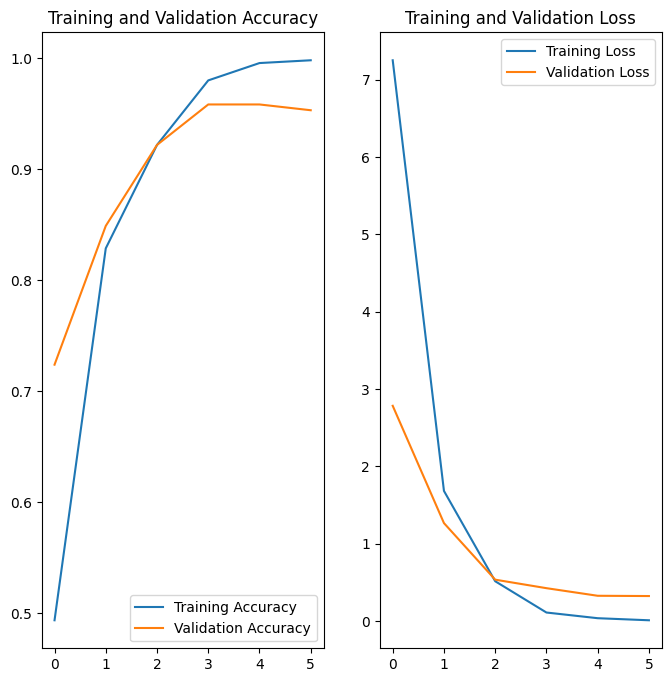

In [33]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(6), acc, label='Training Accuracy')
plt.plot(range(6), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(6), loss, label='Training Loss')
plt.plot(range(6), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: army worm
2/2 [==============================] - 16s 8s/step
predicted label: army worm
2/2 [==============================] - 15s 8s/step
8


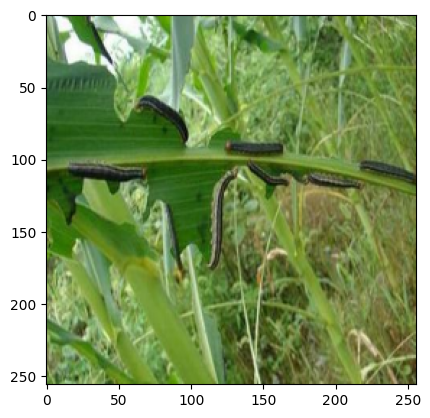

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    predictions = model.predict(images_batch)
    print(np.argmax(predictions))

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [36]:
model.save("../my_model_vgg.h5")

C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the fine-tuned VGG16 model
model = tf.keras.models.load_model('../my_model_vgg.h5')

# Function to preprocess and predict the image
def predict_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescaling
    
    # Make prediction
    prediction = model.predict(img_array)
    
    # Get the predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    return predicted_class, prediction

# Example usage
image_path = r'C:\Users\Yash lichade\Downloads\xxylo.jpg' 
predicted_class, prediction = predict_image(image_path)

print(f"Predicted class index: {predicted_class}")
print(f"Predicted class : {class_names[predicted_class]}")
print(f"Prediction probabilities: {prediction}")

1/1 [==============================] - 0s 481ms/step
Predicted class index: 1
Predicted class : Thrips
Prediction probabilities: [[0.17994095 0.4524929  0.07415706 0.29340914]]


7/7 [==============================] - 30s 4s/step


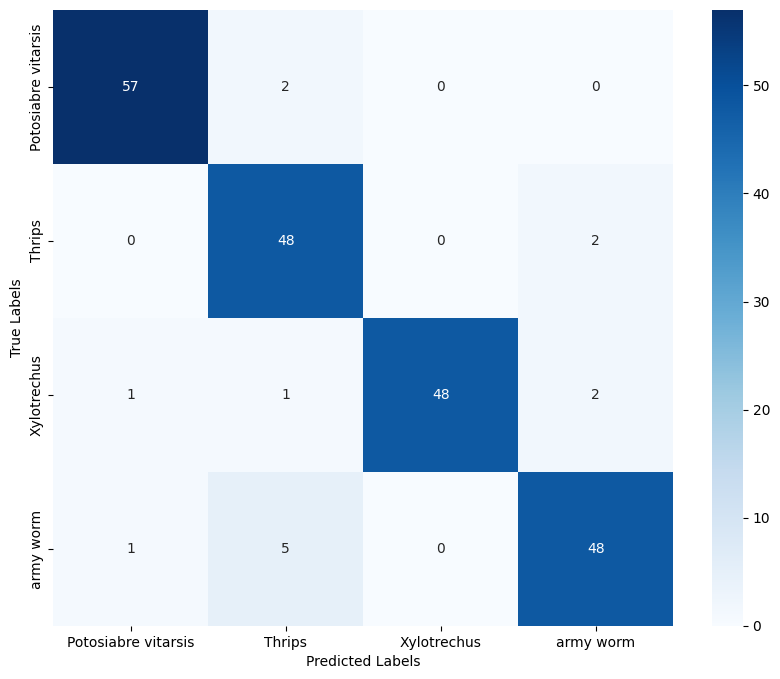

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Get a batch of test data (you can adjust the batch size as needed)
images = []
true_labels = []

for batch_images, batch_labels in test_ds:
    for image, label in zip(batch_images, batch_labels):
        images.append(image)
        true_labels.append(label)


# test_data = next(iter(test_ds))
# images = test_data[0][0:]  # Get the images from the test data batch
# true_labels = test_data[1][0:]  # Get the true labels from the test data batch

# # Make predictions on the test data
# predictions = model.predict(images)
# predicted_labels = np.argmax(predictions, axis=1)

import numpy as np

# Convert list of images to a single tensor
images_tensor = np.stack(images)

# Make predictions on the test data
predictions = model.predict(images_tensor)
predicted_labels = np.argmax(predictions, axis=1)



# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [115]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 41s 12s/step - loss: 1.1339 - accuracy: 0.9349


In [112]:
true_labels[0]

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the fine-tuned VGG16 model
model = tf.keras.models.load_model('../my_model_vgg.h5')

# Function to preprocess and predict the image
def predict_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescaling
    
    # Make prediction
    prediction = model.predict(img_array)
    
    # Get the predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    return predicted_class, prediction

# Example usage
image_path = r'C:\Users\Yash lichade\Downloads\army.jpeg' 
predicted_class, prediction = predict_image(image_path)

print(f"Predicted class index: {predicted_class}")
print(f"Predicted class : {class_names[predicted_class]}")
print(f"Prediction probabilities: {prediction}")

1/1 [==============================] - 1s 539ms/step
Predicted class index: 3
Predicted class : army worm
Prediction probabilities: [[0.05351228 0.37447995 0.02846671 0.5435411 ]]
